In [2]:
import numpy as np
import os

In [3]:
np.random.seed(17)

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

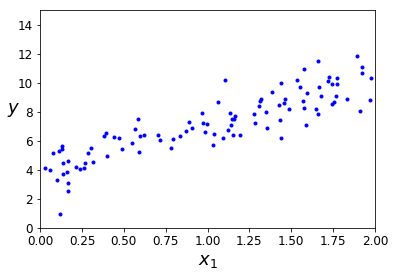

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#### 정규방정식을 사용해서 theta hat 구하기

In [7]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
print(theta_best)

[[3.89053611]
 [3.21724034]]


In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [10]:
y_predict = X_new_b.dot(theta_best)

In [11]:
print(y_predict)

[[ 3.89053611]
 [10.3250168 ]]


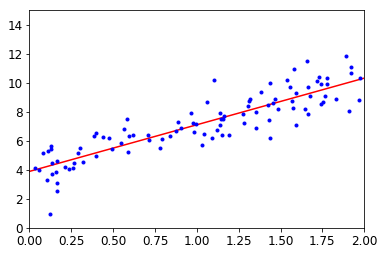

In [12]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.89053611]), array([[3.21724034]]))

In [14]:
lin_reg.predict(X_new)

array([[ 3.89053611],
       [10.3250168 ]])

## 4.2 경사 하강법(Gradient Descent)

#### gradient descent의 간단한 (직접)구현

In [15]:
eta = 0.1
n_iterations = 1000
m = 100

In [16]:
theta = np.random.randn(2, 1)

In [17]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
print(theta)

[[3.89053611]
 [3.21724034]]


#### stocastic gradient descent의 간단한 (직접)구현

In [19]:
n_epochs = 50
t0, t1 = 5, 50

In [20]:
def learning_shedule(t):
    return t0 / (t + t1)

In [21]:
theta = np.random.randn(2, 1)

In [22]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_shedule(epoch * m + i)
        theta = theta - eta * gradients

In [23]:
print(theta)

[[3.90836231]
 [3.14483853]]


#### 사이킷런을 이용한 SGD의 적용

In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/Users/sktelecom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [26]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.85271642] [3.18728781]


## 4.3 다항 회귀

#### 노이즈가 포함된 비선형 데이터셋 생성

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

#### 사이킷런을 이용해서 학습데이터를 변환. 학습 데이터에 있는 각 feature들의 제곱(2차 다항)을 새로운 feature로 추가

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [30]:
print(X[0])

[1.75383909]


In [31]:
print(X_poly[0])

[1.75383909 3.07595155]


#### 위에서 새로운 feature가 추가되 데이터셋에 대해서 Linear Regression을 적용

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print(lin_reg.intercept_, lin_reg.coef_)

[1.88917894] [[0.99248425 0.50432629]]


## 4.4 학습 곡선

#### 학습 데이터에서 모델의 학습곡선을 그리는 함수를 정의

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "훈련세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "검증세트")    
    plt.ylim((0,5)) ## 추가

In [36]:
lin_reg = LinearRegression()

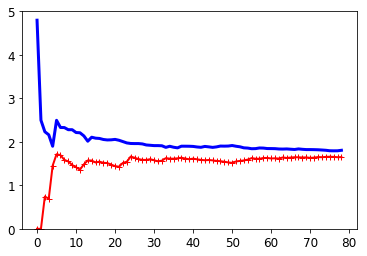

In [37]:
plot_learning_curves(lin_reg, X, y)

In [38]:
from sklearn.pipeline import Pipeline

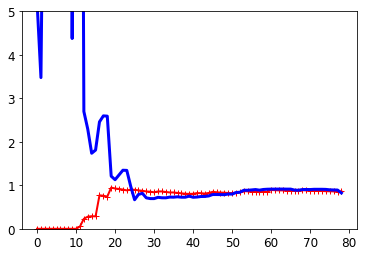

In [39]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree =10, include_bias = False)),
    ("lin_reg", LinearRegression()),  
])

plot_learning_curves(polynomial_regression, X, y)



## 4.5

#### 사이킷런에서 릿지 회귀에 대한 정규방정식 적용

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.05689928]])

#### SGD 사용한 경우

In [41]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.06744667])

#### Lasso

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([5.01590233])

#### ElasticNet

In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.01660137])

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [45]:
X  = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

#### 로지스틱 모형의 훈련

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

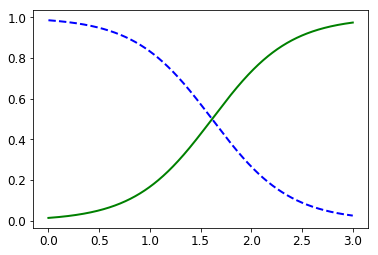

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [49]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### 소프트맥스 회귀

In [51]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)